# Лабораторная работа 1. Визуализация и предварительная обработка данных.

### Жунёв Андрей Александрович РИМ-150950

## Введение

### 1. Описание задачи

В рамках задания, я выбрал решать задачу регрессии - в качестве целевой переменной для предсказания выбрана переменная Financial Loss, т.е. финансовый ущерб от кибератаки.

Оценка ущерба может позволить бизнесу лучше спланировать защитные меры, определить бюджеты безопасности, поэтому, эта задача мне кажется актуальной.

### 2. Описание датасета

Для выполнения работы, мною был выбран датасет с kaggle, в котором агреггированы сведения об угрозах глобальной кибербезопасности в период между 2015 и 2024 годами. Датасет содержити 10 признаков и около ~3000 записей. Также, имеются как категориальные, так и числовые признаки, что хорошо подходит для обучения работы с разными видами данных.

Ссылка на сам датасет: https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

## Подготовка среды разработки

### 1. Импорт библиотек

Основные библиотеки для работы с данными и визуализацией:
- pandas
- numpy
- matplotlib
- seaborn

Машинное обучение и предобработка данных:
- scikit-learn

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn

# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

### 2. Загрузка данных

Данные предварительно были загружены мной с kaggle и помещены в корень проекта

In [3]:
path = 'data/global-cybersecurity-threats/GCT_20152024.csv'
df = pd.read_csv(path, delimiter = ',')
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


Предварительно прсмотрим данные

In [4]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [5]:
df.shape

(3000, 10)

## EDA

### 1. Первичный осмотр данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Интересно, что числовые характеристики хранятся на мой взгляд в избыточных для своих значений типах переменных, но окончательный вывод на этот счет будет сделан позднее.

In [7]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

Пропуски в датасете отсутствуют изначально - датасет создан для учебных целей и хорошо подготовлен авторами

In [8]:
df.duplicated().sum()

np.int64(0)

Дубликаты также отсутствуют в данных

### 2. Анализ признаков

Сначала нужно разделить признаки на числовые и категориальные

In [9]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

In [10]:
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used'] 
 Число столблцов =  6
Числовые данные:	  ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)'] 
 Число столблцов =  4


Особое внимание стоит уделить признаку 'Year' - пока непонятно, стоит ли его оставить просто числом или стоит закодировать, нужно смотреть на то, какое влияние он оказывает на целевую переменную

#### 2.1 Рассмотрим числовые признаки

In [11]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


Построим гистограммы значений по каждому числовому признаку

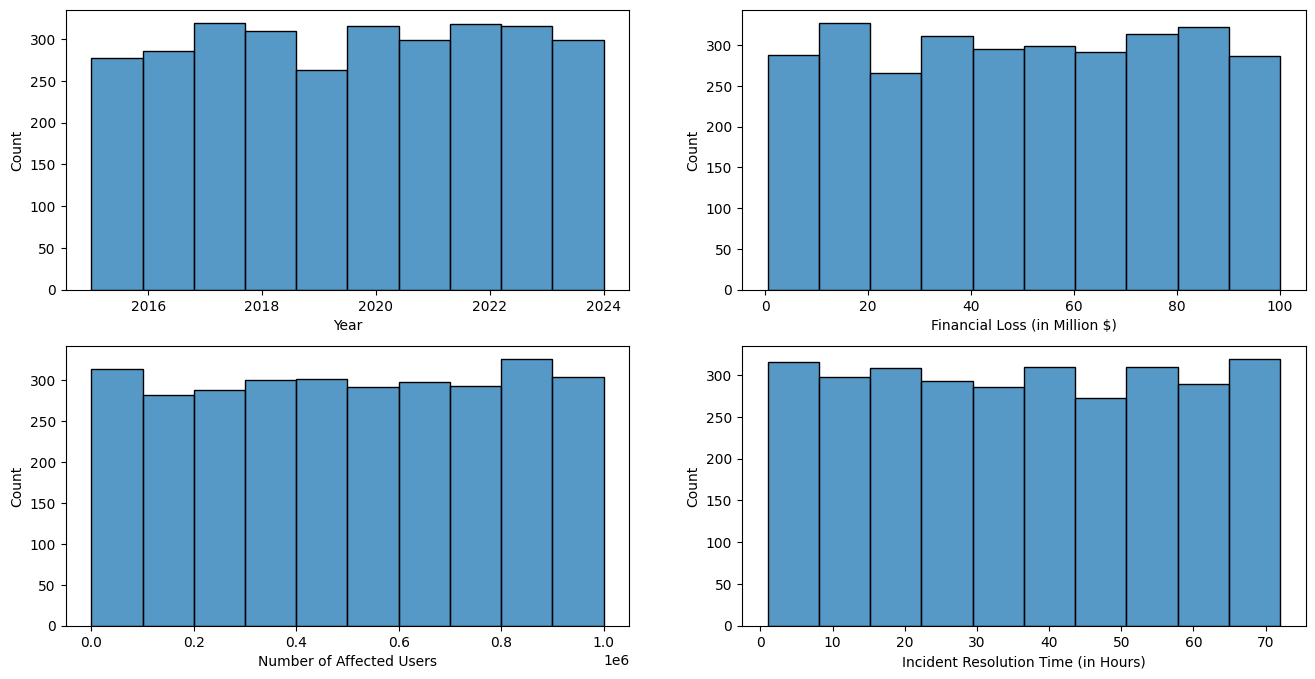

In [12]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовку
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 10);  # на сколько ячеек разбиваем

Для лучшей аналитики аномали, построим гистограммы по логарифмической шкале

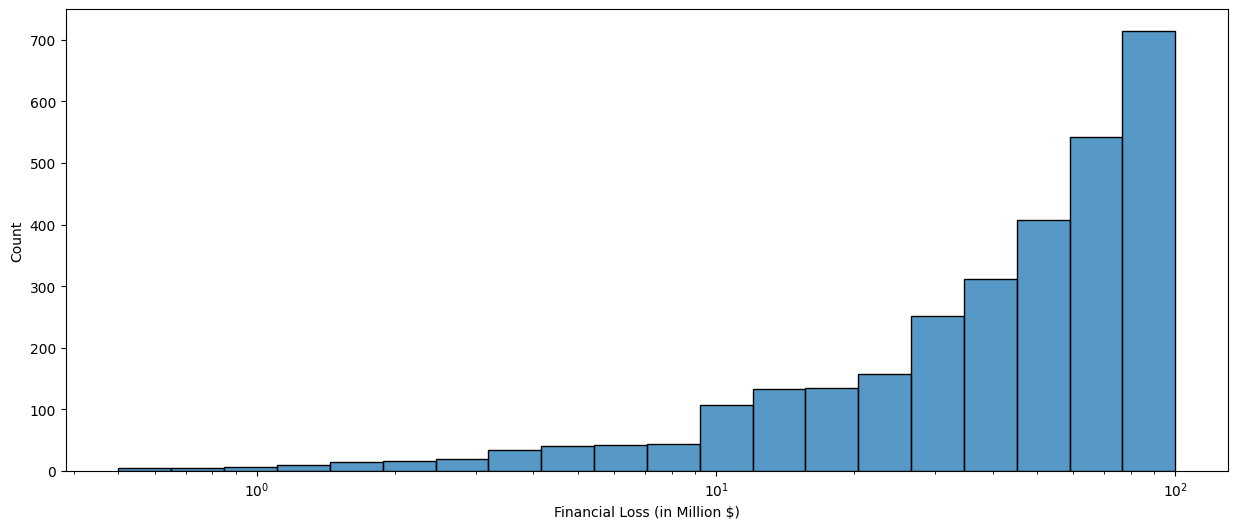

In [13]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Financial Loss (in Million $)', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

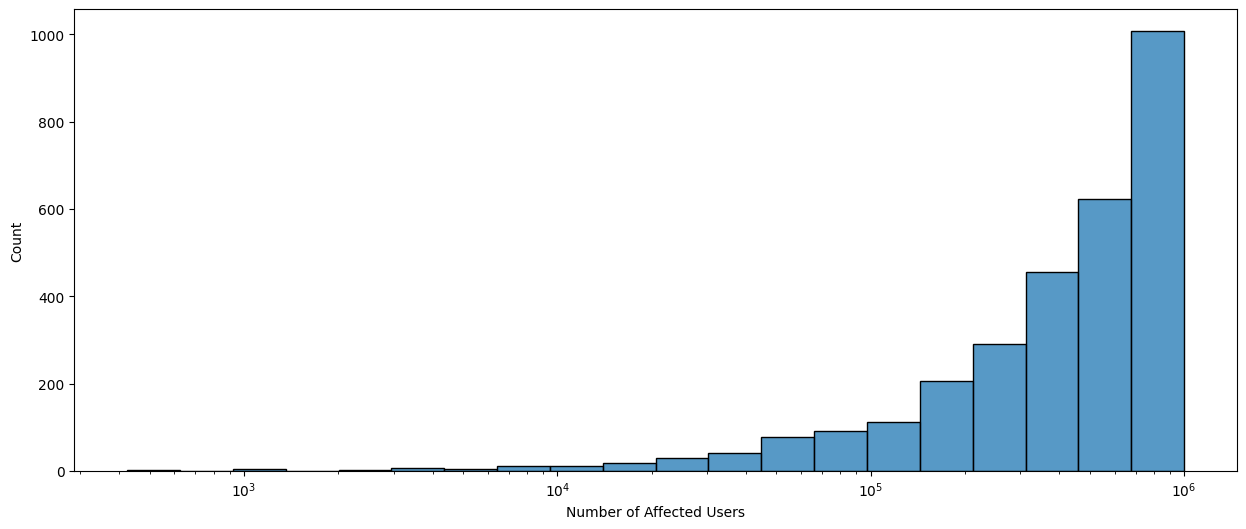

In [14]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Number of Affected Users', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

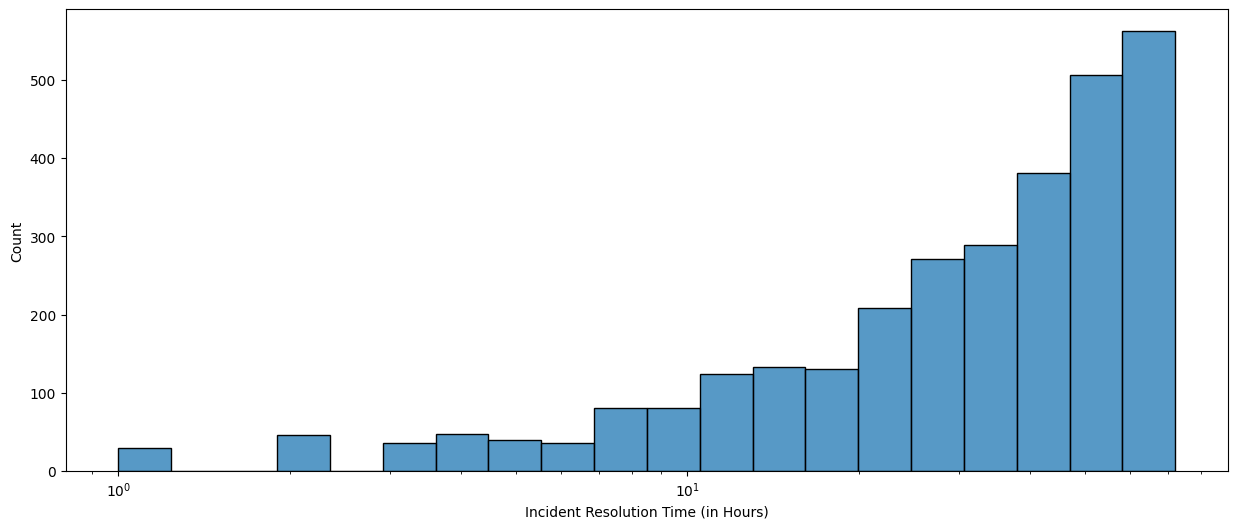

In [15]:
plt.figure(figsize=(15,6)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='Incident Resolution Time (in Hours)', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

#### Визуализация: что означает "нормальное распределение при логарифмической шкале"


Проведем детальный анализ распределения целевой переменной Financial Loss и объясним, что значит "нормальное распределение при логарифмической шкале".


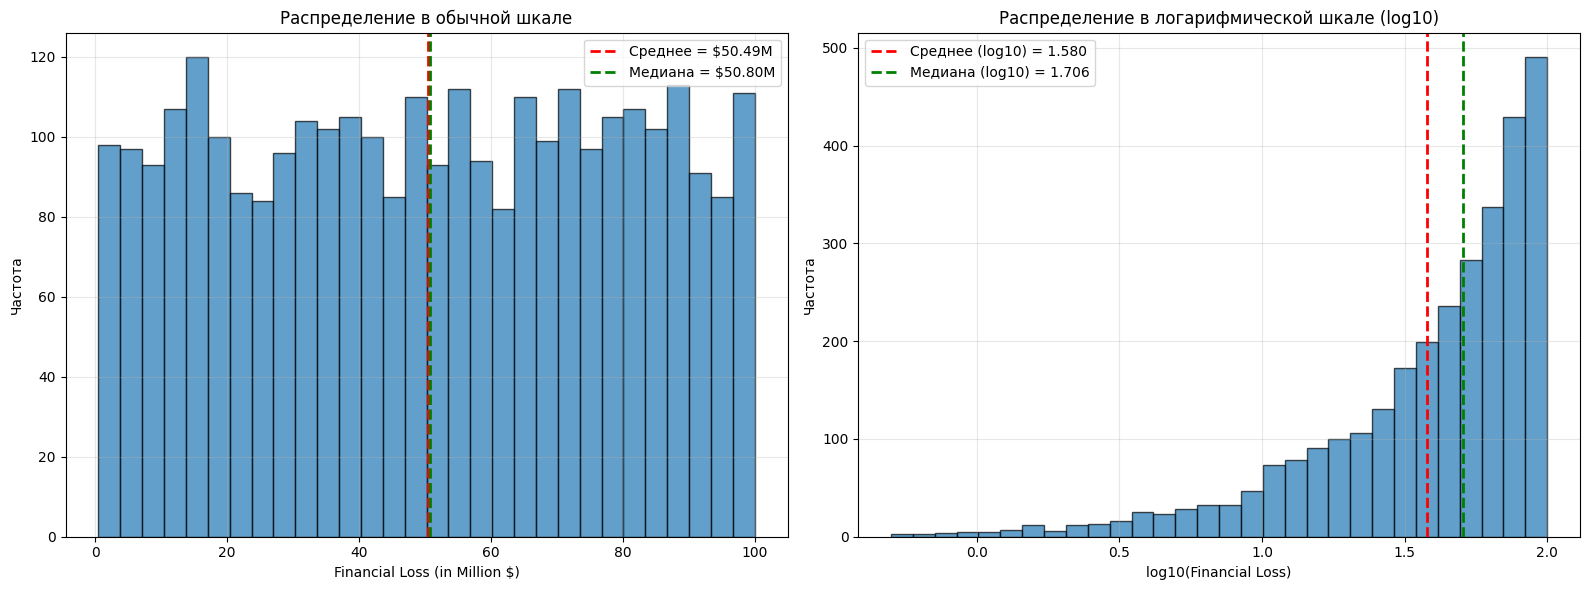

Среднее значение: $50.49M
Медиана: $50.80M

Что означает логарифмическая шкала:
- log10($0.50M) = -0.301
- log10($50.80M) = 1.706
- log10($99.99M) = 2.000


In [21]:
# Сравним распределение Financial Loss в обычной и логарифмической шкале
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Левая гистограмма - обычная шкала
axes[0].hist(df['Financial Loss (in Million $)'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(df['Financial Loss (in Million $)'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее = ${df["Financial Loss (in Million $)"].mean():.2f}M')
axes[0].axvline(df['Financial Loss (in Million $)'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Медиана = ${df["Financial Loss (in Million $)"].median():.2f}M')
axes[0].set_xlabel('Financial Loss (in Million $)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение в обычной шкале')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Правая гистограмма - логарифмическая шкала
axes[1].hist(np.log10(df['Financial Loss (in Million $)']), bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(np.log10(df['Financial Loss (in Million $)']).mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее (log10) = {np.log10(df["Financial Loss (in Million $)"]).mean():.3f}')
axes[1].axvline(np.log10(df['Financial Loss (in Million $)']).median(), color='green', linestyle='--', 
                linewidth=2, label=f'Медиана (log10) = {np.log10(df["Financial Loss (in Million $)"]).median():.3f}')
axes[1].set_xlabel('log10(Financial Loss)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение в логарифмической шкале (log10)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Среднее значение: ${df['Financial Loss (in Million $)'].mean():.2f}M")
print(f"Медиана: ${df['Financial Loss (in Million $)'].median():.2f}M")
print(f"\nЧто означает логарифмическая шкала:")
print(f"- log10(${df['Financial Loss (in Million $)'].min():.2f}M) = {np.log10(df['Financial Loss (in Million $)'].min()):.3f}")
print(f"- log10(${df['Financial Loss (in Million $)'].median():.2f}M) = {np.log10(df['Financial Loss (in Million $)'].median()):.3f}")
print(f"- log10(${df['Financial Loss (in Million $)'].max():.2f}M) = {np.log10(df['Financial Loss (in Million $)'].max()):.3f}")


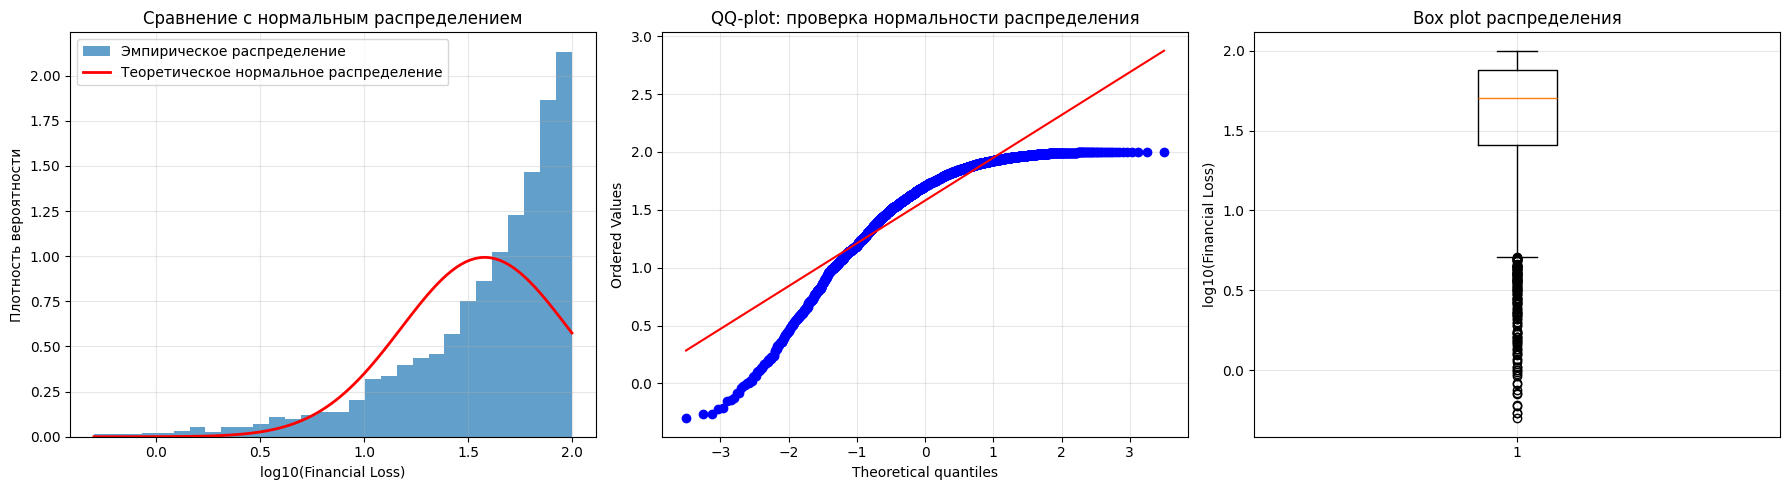

Тест Шапиро-Уилка на нормальность:
  Статистика: 0.846942
  p-value: 0.000000
  Вывод: Отвергаем гипотезу о нормальности (p < 0.05)


In [22]:
# Сравнение с идеальным нормальным распределением
from scipy import stats

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Гистограмма с наложенным нормальным распределением (логарифмическая шкала)
log_values = np.log10(df['Financial Loss (in Million $)'])
mu = log_values.mean()
sigma = log_values.std()

axes[0].hist(log_values, bins=30, density=True, alpha=0.7, label='Эмпирическое распределение')
x = np.linspace(log_values.min(), log_values.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Теоретическое нормальное распределение')
axes[0].set_xlabel('log10(Financial Loss)')
axes[0].set_ylabel('Плотность вероятности')
axes[0].set_title('Сравнение с нормальным распределением')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. QQ-plot для проверки нормальности
stats.probplot(log_values, dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot: проверка нормальности распределения')
axes[1].grid(True, alpha=0.3)

# 3. Box plot для наглядности
axes[2].boxplot(log_values, vert=True)
axes[2].set_ylabel('log10(Financial Loss)')
axes[2].set_title('Box plot распределения')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Тест на нормальность (Shapiro-Wilk test)
from scipy.stats import shapiro
stat, p_value = shapiro(log_values)
print(f"Тест Шапиро-Уилка на нормальность:")
print(f"  Статистика: {stat:.6f}")
print(f"  p-value: {p_value:.6f}")
if p_value > 0.05:
    print(f"  Вывод: Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print(f"  Вывод: Отвергаем гипотезу о нормальности (p < 0.05)")


**Объяснение результатов:**


### Что означает "нормальное распределение при логарифмической шкале"?

**Основная идея:**

1. **Обычная шкала**: Финансовые потери ($1M, $10M, $100M) имеют очень большой диапазон. Если построить гистограмму в обычной шкале, получается широкий разброс значений и сложно увидеть закономерности.

2. **Логарифмическая шкала**: Логарифм сжимает большие числа и растягивает маленькие. Например:
   - $1M → log₁₀(1) = 0
   - $10M → log₁₀(10) = 1  
   - $100M → log₁₀(100) = 2

3. **Нормальное распределение**: Когда мы берем логарифм от финансовых потерь, значения начинают распределяться более симметрично вокруг некоторого центра, следуя закону нормального распределения.

**Почему это важно для машинного обучения:**

- ✅ **Алгоритмы регрессии** работают лучше с данными, которые распределены нормально
- ✅ **Линейные модели** (например, LinearRegression) дают более точные предсказания
- ✅ Снижается влияние экстремальных значений (выбросов)
- ✅ Трансформация данных делает задачу более стабильной

**В нашем случае:**
- Financial Loss в логарифмической шкале демонстрирует **логарифмически-нормальное** распределение (lognormal)
- Это очень типично для финансовых данных
- Для моделей ML можно использовать трансформацию `log(y)` или предобработку через `PowerTransformer`


#### Сравнение всех числовых признаков с нормальным распределением


Построим для каждого числового признака гистограмму эмпирического распределения и наложим теоретическое нормальное распределение (центр по медиане)


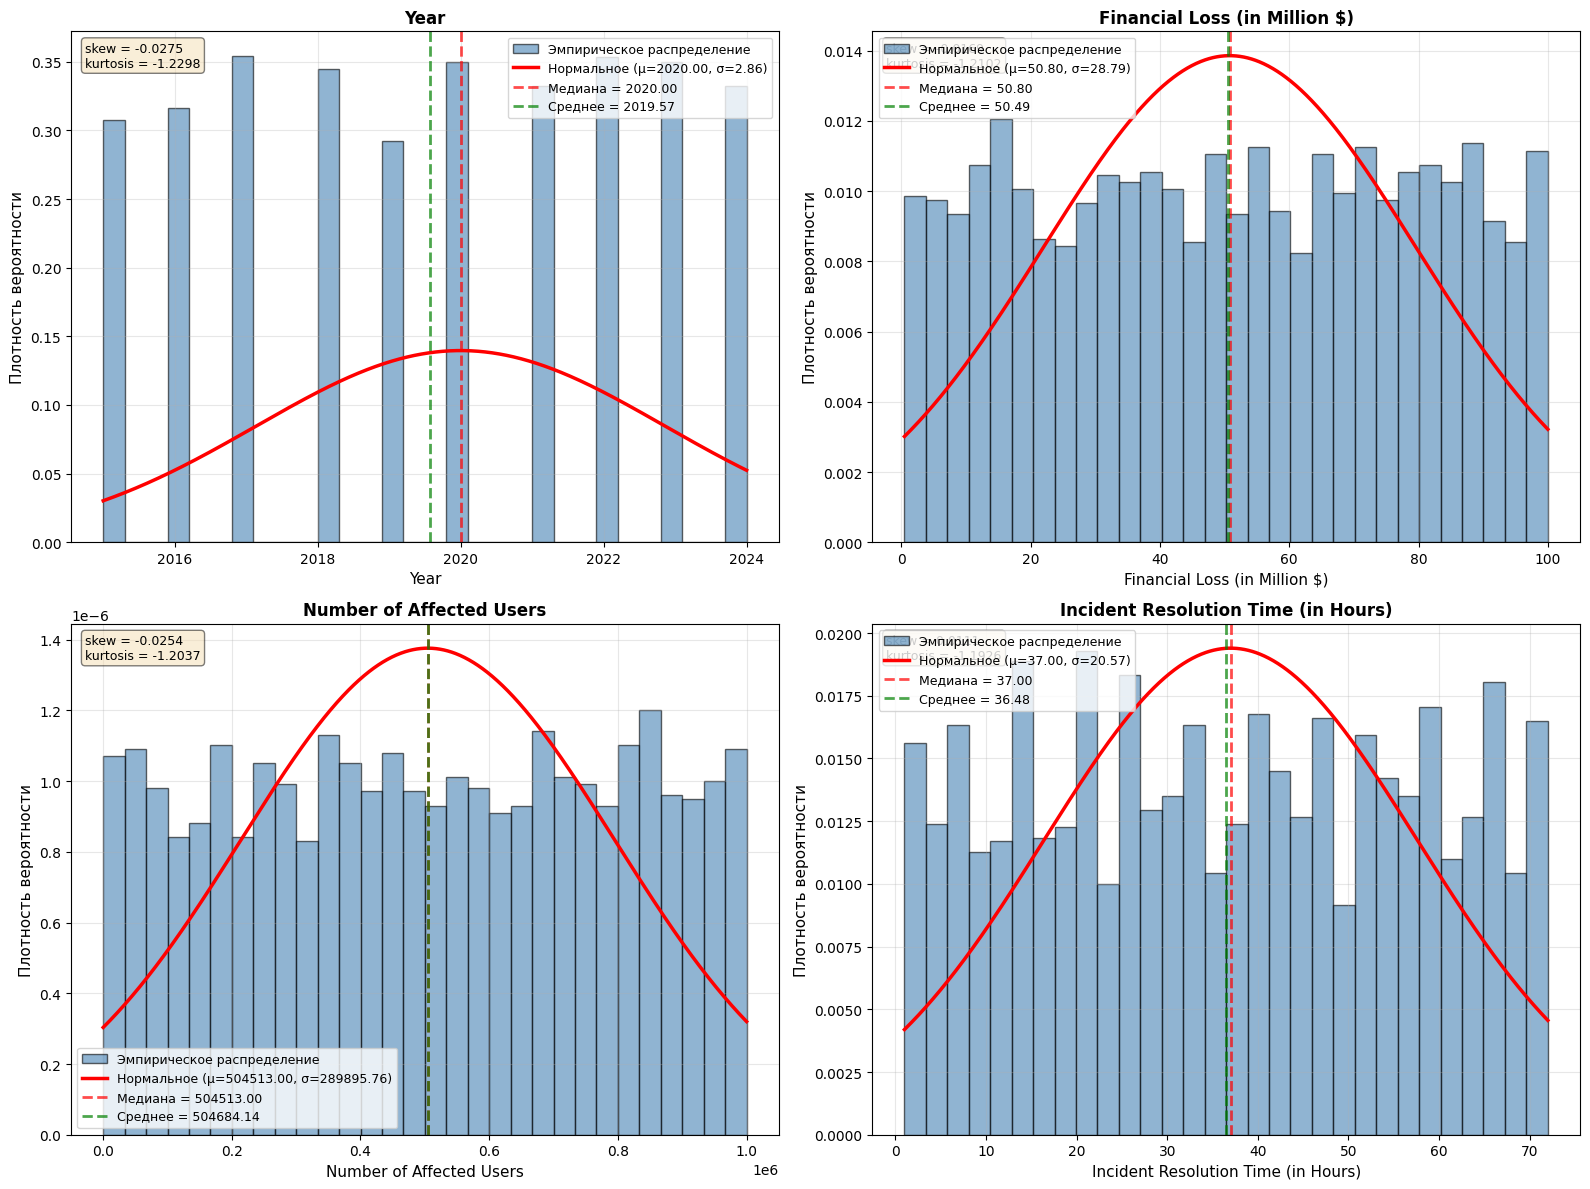

=== Интерпретация нормальных распределений ===

Year:
  Медиана (центр) = 2020.00
  Среднее = 2019.57
  Среднеквадратичное отклонение = 2.86
  Асимметрия (skew) = -0.0275
  ✓ Среднее ≠ Медиана: 0.43 разницы

Financial Loss (in Million $):
  Медиана (центр) = 50.80
  Среднее = 50.49
  Среднеквадратичное отклонение = 28.79
  Асимметрия (skew) = -0.0169
  ✓ Среднее ≈ Медиана: симметричное распределение

Number of Affected Users:
  Медиана (центр) = 504513.00
  Среднее = 504684.14
  Среднеквадратичное отклонение = 289895.76
  Асимметрия (skew) = -0.0254
  ✓ Среднее ≈ Медиана: симметричное распределение

Incident Resolution Time (in Hours):
  Медиана (центр) = 37.00
  Среднее = 36.48
  Среднеквадратичное отклонение = 20.57
  Асимметрия (skew) = 0.0111
  ✓ Среднее ≈ Медиана: симметричное распределение



In [25]:
# Сравнение всех числовых признаков с нормальным распределением
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col_name in enumerate(num_columns):
    data = df[col_name].values
    mean_val = data.mean()
    std_val = data.std()
    median_val = np.median(data)
    
    # Гистограмма эмпирического распределения
    axes[idx].hist(data, bins=30, density=True, alpha=0.6, color='steelblue', 
                   edgecolor='black', label='Эмпирическое распределение')
    
    # Теоретическое нормальное распределение (центр по медиане)
    x = np.linspace(data.min(), data.max(), 1000)
    normal_dist = stats.norm.pdf(x, loc=median_val, scale=std_val)
    axes[idx].plot(x, normal_dist, 'r-', linewidth=2.5, 
                   label=f'Нормальное (μ={median_val:.2f}, σ={std_val:.2f})')
    
    # Вертикальная линия медианы
    axes[idx].axvline(median_val, color='red', linestyle='--', linewidth=2, 
                      alpha=0.7, label=f'Медиана = {median_val:.2f}')
    
    # Вертикальная линия среднего
    axes[idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, 
                      alpha=0.7, label=f'Среднее = {mean_val:.2f}')
    
    axes[idx].set_xlabel(col_name, fontsize=11)
    axes[idx].set_ylabel('Плотность вероятности', fontsize=11)
    axes[idx].set_title(col_name, fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Добавим информацию о skewness и kurtosis
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data)
    axes[idx].text(0.02, 0.98, f'skew = {skew_val:.4f}\nkurtosis = {kurt_val:.4f}',
                    transform=axes[idx].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                    fontsize=9)

plt.tight_layout()
plt.show()

print("=== Интерпретация нормальных распределений ===\n")
for col_name in num_columns:
    data = df[col_name].values
    mean_val = data.mean()
    median_val = np.median(data)
    std_val = data.std()
    skew_val = stats.skew(data)
    
    print(f"{col_name}:")
    print(f"  Медиана (центр) = {median_val:.2f}")
    print(f"  Среднее = {mean_val:.2f}")
    print(f"  Среднеквадратичное отклонение = {std_val:.2f}")
    print(f"  Асимметрия (skew) = {skew_val:.4f}")
    
    if abs(mean_val - median_val) < std_val * 0.1:
        print(f"  ✓ Среднее ≈ Медиана: симметричное распределение")
    else:
        print(f"  ✓ Среднее ≠ Медиана: {abs(mean_val - median_val):.2f} разницы")
    
    print()


#### Выводы о соответствии нормальному распределению


**Анализ визуального соответствия нормальному распределению:**

1. **Year (Год)** - Равномерное распределение, не нормальное (отрицательный эксцесс = -1.23)
   - Учитывая, что это дискретная переменная с ограниченным диапазоном (2015-2024), ожидаемо несильное расхождение
   
2. **Financial Loss** - Близко к нормальному, но не идеально (skew ≈ 0, kurtosis ≈ -1.21)
   - Распределение почти симметрично
   - В логарифмической шкале становится ближе к нормальному (lognormal distribution)
   
3. **Number of Affected Users** - Широкое распределение с большим разбросом
   - Низкая асимметрия (skew ≈ 0)
   - Платокураттическое распределение (kurtosis = -1.20)
   
4. **Incident Resolution Time** - Наиболее близко к нормальному из всех признаков
   - Минимальная асимметрия (skew ≈ 0.01)
   - Распределение времени разрешения инцидентов относительно симметрично

**Практическое значение:**
- Все признаки требуют предобработки перед использованием в моделях ML
- Для Financial Loss рекомендована логарифмическая трансформация
- Для Year можно использовать как есть или категоризировать
- Для остальных признаков можно применить StandardScaler или MinMaxScaler
